In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 100000)

In [2]:
data=pd.read_csv('datasets/fetched_data.csv')

In [3]:
data.sample(5)

,id,tweet,dialect
218672,970840979321380864,@alhanof300301 @g9g_g9g9 ههههههه من بيسبق انا ولا انتي يا قمر 😄😄😉,YE
199655,1135459216913772416,كثر ماحن قلبي للونيس وكثر مادرهمت\nفجر صدري حنيني واتعب الاقدام درهامي,SA
194453,518492774471958528,ودي انزل لي قصيدة عن العيد\nمير البلا هالعيد فاقد له انسان\nانسان يسوى الناس والجان والبيد \nويسوى السحايب كلبوها والاكوان,SA
106669,1160892948181082112,مش شايف اشي حلو بالموضوع بالعكس https://t.co/YcnR9xI6tH,PL
301737,1098981551969316864,@maganenoo ده دورها لما تلاقی حریقه تطفیها قبل ماتاکل الاخضر والیابس امال سموها سیادیه لیه,EG


<AxesSubplot:>

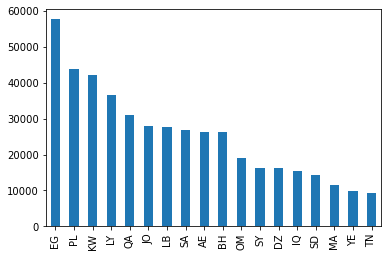

In [4]:
data.dialect.value_counts().plot(kind='bar')

In [9]:
data.isna().sum()

id         0
tweet      0
dialect    0
dtype: int64

In [285]:
import string
import re

punctuation = '''٠١٢٣٤٥٦٧٨٩`÷×؛<>_()*&^%][،/:"؟.,'{}~¦+|!”…“–'''+string.punctuation
rx = '[' + re.escape(punctuation) + ']'


def clean_data(text):
    text=re.sub(rx,' ',text) #remove punctuation
    text=re.sub(r'[^\u0600-\u06ff\u0750-\u077f\ufb50-\ufbc1\ufbd3-\ufd3f\ufd50-\ufd8f\ufd50-\ufd8f\ufe70-\ufefc\uFDF0-\uFDFD]+'
                , ' ', text) #remove any non-Arabic string
    
    text=re.sub(r'[\s]+',' ',text) # remove more than one white space
    return text


In [286]:
data_cleaned=data.copy()
data_cleaned['tweet']=data_cleaned['tweet'].apply(clean_data)

In [287]:
data_cleaned.sample(5)

,id,tweet,dialect
183715,1065721645778812800,حتى انا كنت بخالك هاذ سيمانة كنت كنحس انني وحيدة وحتى حاجة مزوينة ملل ولكن متخليش هاذ شعور يتغلب عليك متبقايش غير بوحيدتك تعرفي على اصدقاء جدد فحياتك ديري شنو كتبغي شنو كيفرحك خرجي تمشاي الا حداك البحر قراي الا كنتي كتبغي تقراي غير متغلقيش عليك الباب,MA
26288,1130890436619513984,كريس كبر وشفته فى المباراه الكيد كله ع هاردن وبالجو لو يبي بطوله يطلع من هيوستن ارجله,LY
429724,1143420057114095616,شأن عائلي ما نقدر نعلق,AE
275291,852895235298525184,جماعه ارهابيه لا يهمها دين ولا وطن,EG
85618,1082132045567086592,هادا يزلمتي لاعب حتى امه بتعرفهوش,PL


In [292]:
data_cleaned.to_csv('datasets/cleaned_data.csv',index=False)